<a href="https://www.kaggle.com/code/nikithareddy4/mall-customer-segmentation-k-mean?scriptVersionId=128814614" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customer-segmentation-data/Mall_Customers.csv


**import library**

we need to insall a wide variety if libraries.For this we install pandas,numpy,seaborn and matplotlib libraries.
pands: Pands stands for "Python Data Analysis Library".Pands makes it simple to do many of the time consuming, repitative tasks associated with working data, including:
Data cleaning
Data fill
Merges and Joins
Data visualizaton
Statical analysis
Data inspection
Loading and saving data
Numpy:Numpy is a python library that provides a simple yet powerful data structure.
seaborn:seaborn is a python data visalization library based on matplotib.It provides a high-level interface for drawing attractive and information statistical graphics.
Matplotlib:Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data Exploratory Analysis: Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [3]:
data=pd.read_csv('../input/mall-customer-segmentation-data/Mall_Customers.csv')
# read csv for analysis

In [4]:
data.head()
# the output will be first five lines

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()
#we'll see the last five lines.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.sample(5)
#random data 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
64,65,Male,63,48,51
125,126,Female,31,70,77
55,56,Male,47,43,41
30,31,Male,60,30,4
83,84,Female,46,54,44


In [7]:
data.shape
# to find total number of rows and columns in the data set using “.shape”.

(200, 5)

In [8]:
data.describe()
#It is a function that shows the analysis of numerical values.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#It shows the data types in the data set.
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
#rename the data's columns
data.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'},inplace=True)

In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [12]:
#count null values
data.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [13]:
print(list(data.isnull().any()))
#every feature control check null value in this data

[False, False, False, False, False]


In [14]:
#data control null values
data.isnull().values.any()

False

In [15]:
#data type control
data.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [16]:
#data correlation
data.corr()

,CustomerID,Age,AnnualIncome,SpendingScore
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
AnnualIncome,0.977548,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.327227,0.009903,1.000000


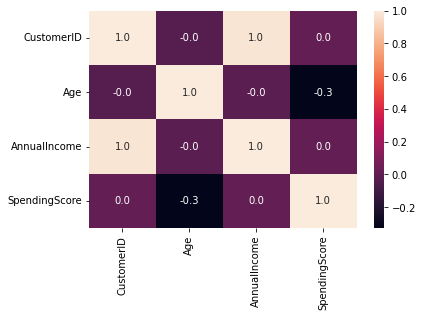

In [17]:
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [18]:
#show data gender unique
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [19]:
#show gender value counts
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


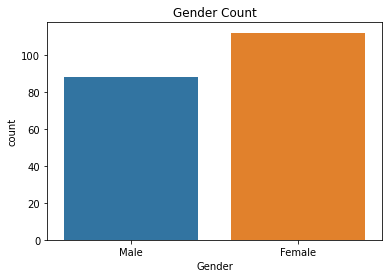

In [20]:
#show graph data gender
sns.countplot(data.Gender)
plt.title('Gender Count')
plt.show()

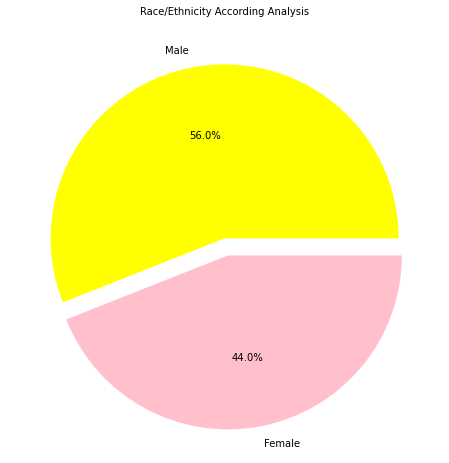

In [21]:
labels=data.Gender.unique()
colors=['yellow','pink']
explode=[0,0.1]
values=data.Gender.value_counts().values

#visualization
plt.figure(figsize=(8,8))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

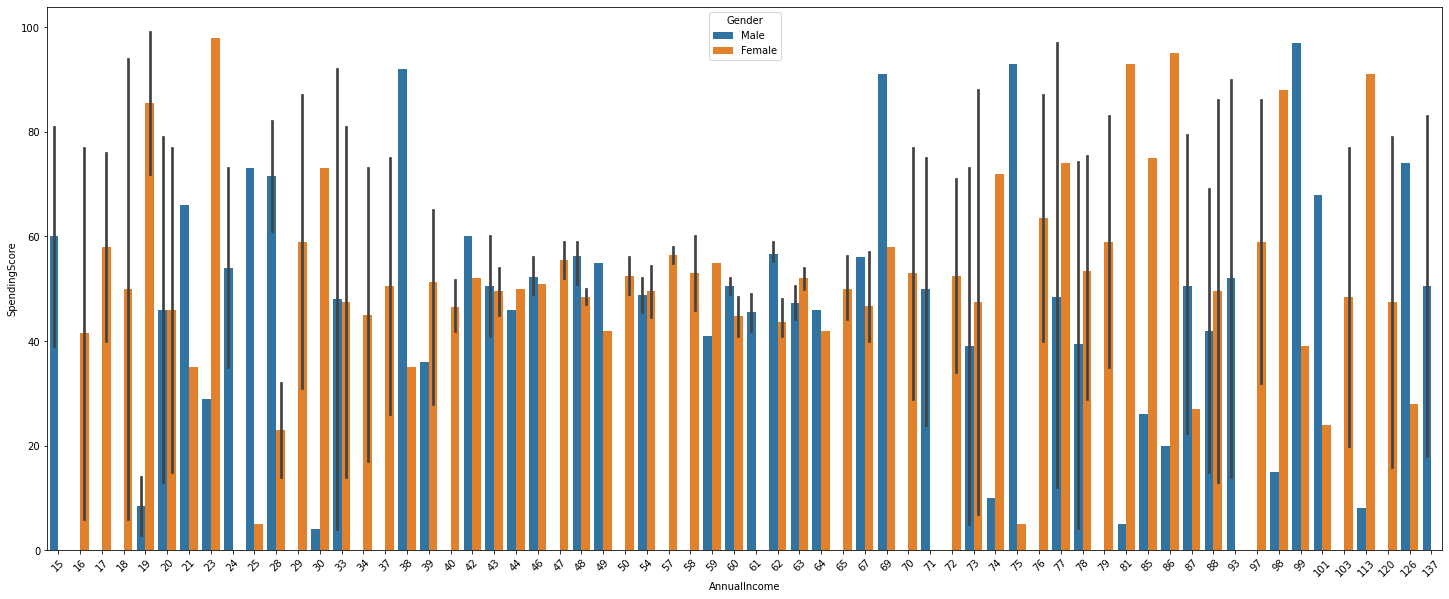

In [22]:
plt.figure(figsize=(25,10))
sns.barplot(x = "AnnualIncome", y = "SpendingScore", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

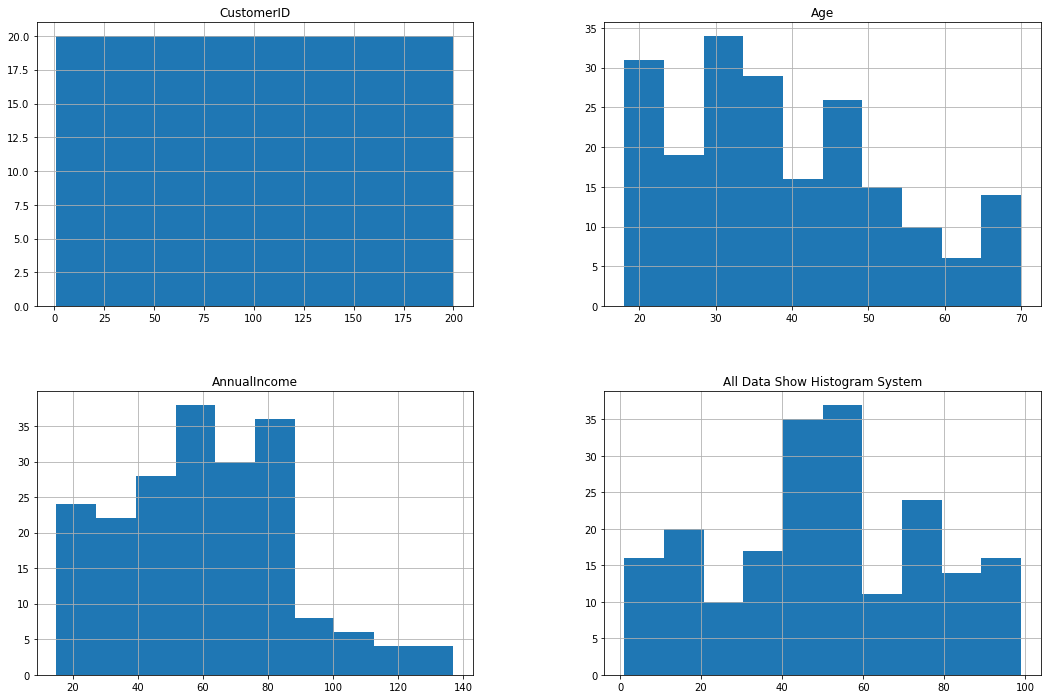

In [23]:
data.hist(figsize=(18,12))
plt.title('All Data Show Histogram System')
plt.show()

In [24]:
#Male Age 
print('Max  :',max(data[data['Gender']=='Male'].Age))
print('Min  :',min(data[data['Gender']=='Male'].Age))
print('Mean :',np.mean(data[data['Gender']=='Male'].Age))
print('Std  :',np.std(data[data['Gender']=='Male'].Age))

Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472944


In [25]:
#Female Age
print('Max  :',max(data[data['Gender']=='Female'].Age))
print('Min  :',min(data[data['Gender']=='Female'].Age))
print('Mean :',np.mean(data[data['Gender']=='Female'].Age))
print('Std  :',np.std(data[data['Gender']=='Female'].Age))

Max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581055


In [26]:
#Male Income 
print('Max  :',max(data[data['Gender']=='Male'].AnnualIncome))
print('Min  :',min(data[data['Gender']=='Male'].AnnualIncome))
print('Mean :',np.mean(data[data['Gender']=='Male'].AnnualIncome))
print('Std  :',np.std(data[data['Gender']=='Male'].AnnualIncome))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


In [27]:
#Female Age
print('Max  :',max(data[data['Gender']=='Female'].AnnualIncome))
print('Min  :',min(data[data['Gender']=='Female'].AnnualIncome))
print('Mean :',np.mean(data[data['Gender']=='Female'].AnnualIncome))
print('Std  :',np.std(data[data['Gender']=='Female'].AnnualIncome))

Max  : 126
Min  : 16
Mean : 59.25
Std  : 25.8955663607278


In [28]:
#Male SpendingScore 
print('Max  :',max(data[data['Gender']=='Male'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Male'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Male'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Male'].SpendingScore))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [29]:
#Female SpendingScore
print('Max  :',max(data[data['Gender']=='Female'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Female'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Female'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Female'].SpendingScore))

Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.00705246880166


In [30]:
data.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [31]:
print(len(data.Age.unique()))

51


In [32]:
data.Age.value_counts()[:10]

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
Name: Age, dtype: int64

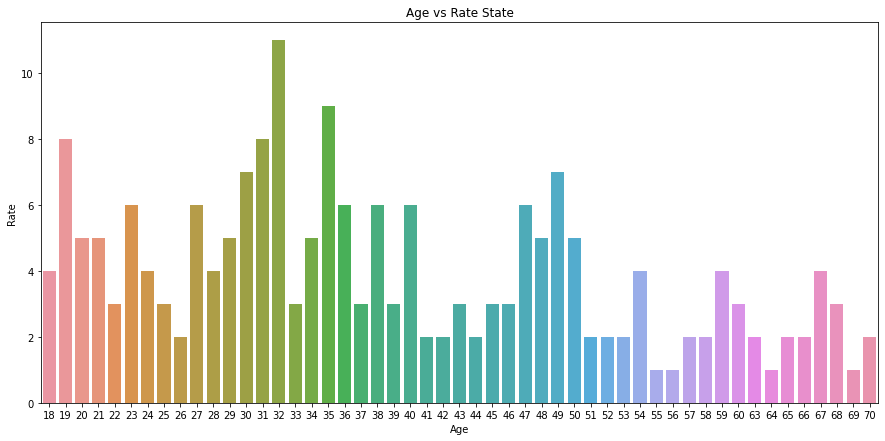

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(x=data.Age.value_counts().index,y=data.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.title('Age vs Rate State')
plt.show()

In [34]:
age_income=[]
age_unique=data.Age.unique()
for age in age_unique:
    age_income.append(sum(data[data['Age']==age].AnnualIncome))

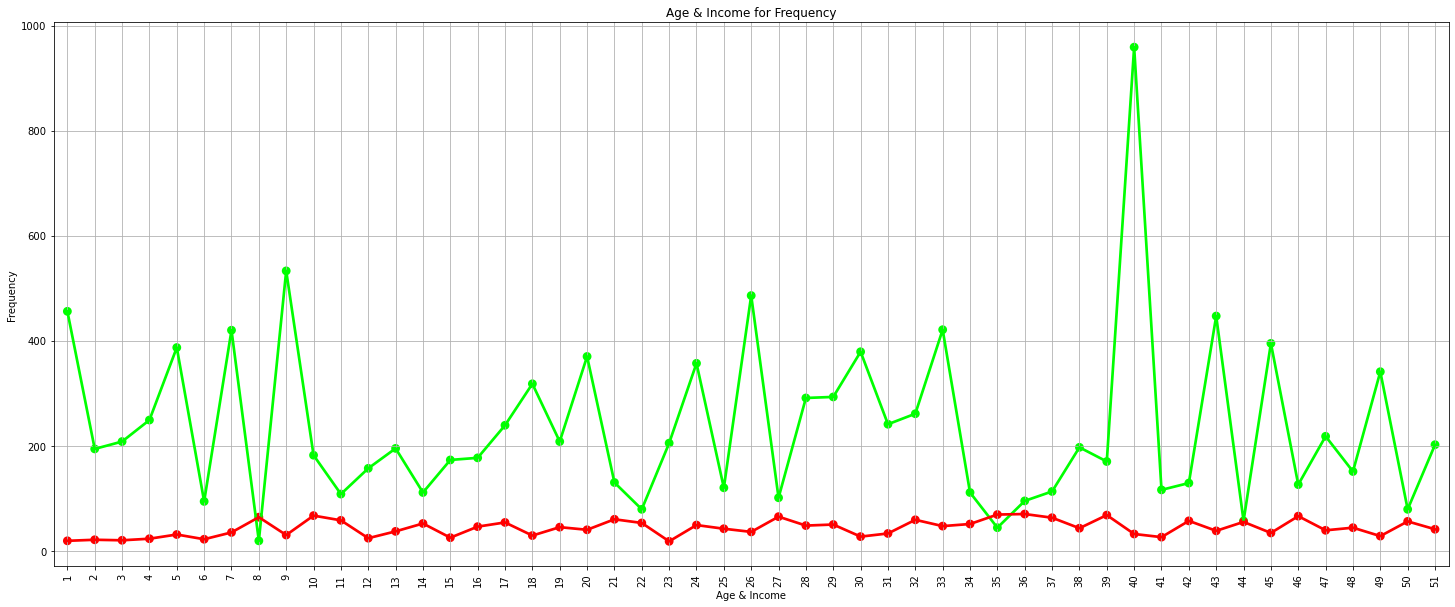

In [35]:
#Age show point plot
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,52),y=age_income,color='lime',alpha=0.8,label='Income')
sns.pointplot(x=np.arange(1,52),y=age_unique,color='red',alpha=0.5,label='Age')
plt.xlabel('Age & Income')
plt.ylabel('Frequency')
plt.title('Age & Income for Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [36]:
age_female_income=[]
age_male_income=[]
for age in age_unique:
    age_male_income.append(sum(data[np.logical_and(data['Gender']=='Male',data['Age']==age)].AnnualIncome))
    age_female_income.append(sum(data[np.logical_and(data['Gender']=='Female',data['Age']==age)].AnnualIncome))

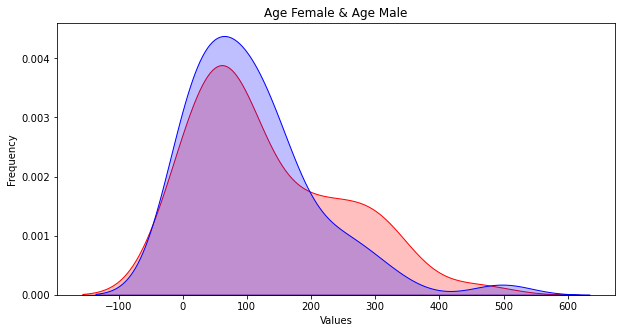

In [37]:
plt.figure(figsize=(10,5))
sns.kdeplot(age_female_income,shade=True,color='r')
sns.kdeplot(age_male_income,shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Female & Age Male')
plt.show()

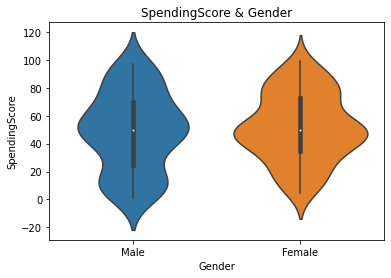

In [38]:
sns.violinplot(y=data['SpendingScore'],x=data['Gender'])
plt.title('SpendingScore & Gender')
plt.show()

In [39]:
age_female_spendingScore=[]
age_male_spendingScore=[]
for age in age_unique:
    age_male_spendingScore.append(sum(data[np.logical_and(data['Gender']=='Male',data['Age']==age)].SpendingScore))
    age_female_spendingScore.append(sum(data[np.logical_and(data['Gender']=='Female',data['Age']==age)].SpendingScore))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


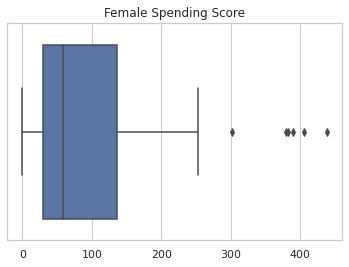

In [40]:
sns.set(style='whitegrid')
sns.boxplot(age_female_spendingScore)
plt.title('Female Spending Score')
plt.show()

In [41]:
data['GenderValue']=[ 0 if gender=='Female' else 1 for gender in data.Gender]

In [42]:
data.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
GenderValue       int64
dtype: object

In [43]:
data['AgesBetween']= pd.cut(data['Age'],5)

In [44]:
data.AgesBetween.unique()

[(17.948, 28.4], (28.4, 38.8], (59.6, 70.0], (49.2, 59.6], (38.8, 49.2]]
Categories (5, interval[float64, right]): [(17.948, 28.4] < (28.4, 38.8] < (38.8, 49.2] < (49.2, 59.6] < (59.6, 70.0]]

In [45]:
age_between=[]
for age in data.Age:
    if((age>=17.948 and age<28.4)):
        age_between.append(0)
    elif((age>=28.4 and age<38.8)):
        age_between.append(1)
    elif((age>=38.8 and age<49.2)):
        age_between.append(2)
    elif((age>=49.2 and age<59.6)):
        age_between.append(3)
    elif((age>=59.6 and age<=70.0)):
        age_between.append(4)

In [46]:
len(age_between)

200

In [47]:
age_between[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 4, 1]

In [48]:
age_between=pd.DataFrame(data=age_between,index=range(0,200),columns=['AgeValueBetween'])

In [49]:
data.sample(10)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,GenderValue,AgesBetween
156,157,Male,37,78,1,1,"(28.4, 38.8]"
55,56,Male,47,43,41,1,"(38.8, 49.2]"
132,133,Female,25,72,34,0,"(17.948, 28.4]"
35,36,Female,21,33,81,0,"(17.948, 28.4]"
148,149,Female,34,78,22,0,"(28.4, 38.8]"
94,95,Female,32,60,42,0,"(28.4, 38.8]"
71,72,Female,47,49,42,0,"(38.8, 49.2]"
41,42,Male,24,38,92,1,"(17.948, 28.4]"
199,200,Male,30,137,83,1,"(28.4, 38.8]"
193,194,Female,38,113,91,0,"(28.4, 38.8]"


In [50]:
data=pd.concat([data,age_between],axis=1)

In [51]:
len(data.columns)

8

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

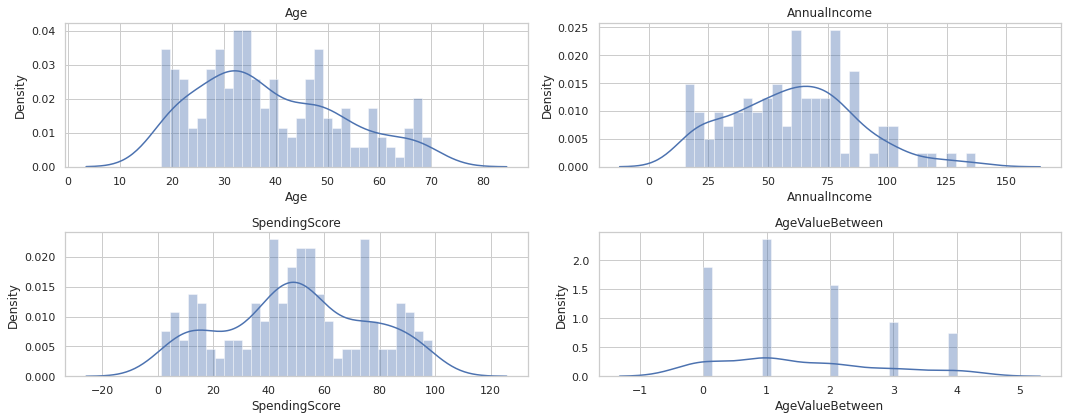

In [52]:
plt.figure(1 , figsize = (15 , 6))
for i,col in enumerate(['Age','AnnualIncome','SpendingScore','AgeValueBetween']):
    i=i+1
    plt.subplot(2 , 2,i)
    plt.title(col)
    sns.distplot(data[col] , bins = 30)
    plt.tight_layout()
plt.show()

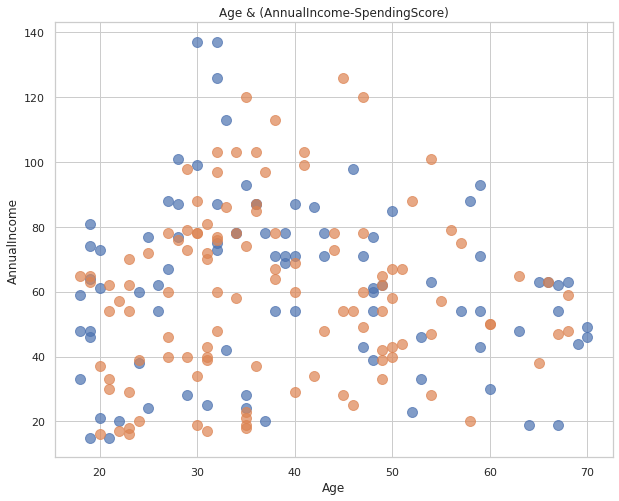

In [53]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Age',y='AnnualIncome',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('AnnualIncome')
    plt.title('Age & (AnnualIncome-SpendingScore)')
plt.show()

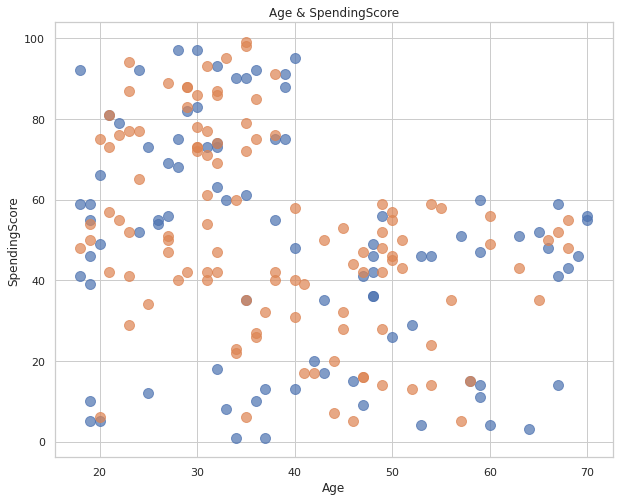

In [54]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Age',y='SpendingScore',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('SpendingScore')
    plt.title('Age & SpendingScore')
plt.show()

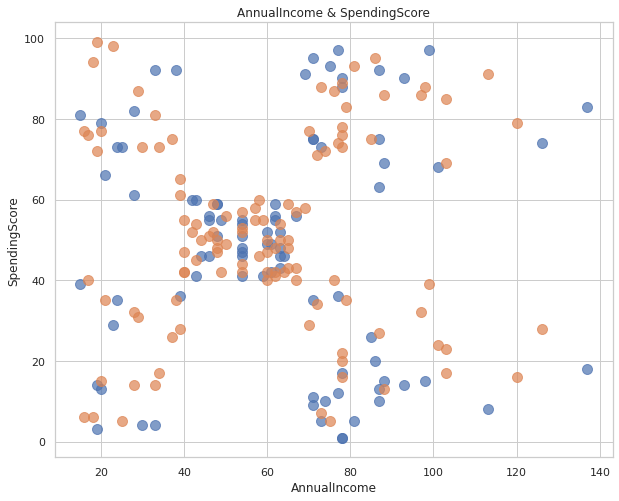

In [55]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='AnnualIncome',y='SpendingScore',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('AnnualIncome')
    plt.ylabel('SpendingScore')
    plt.title('AnnualIncome & SpendingScore')
plt.show()

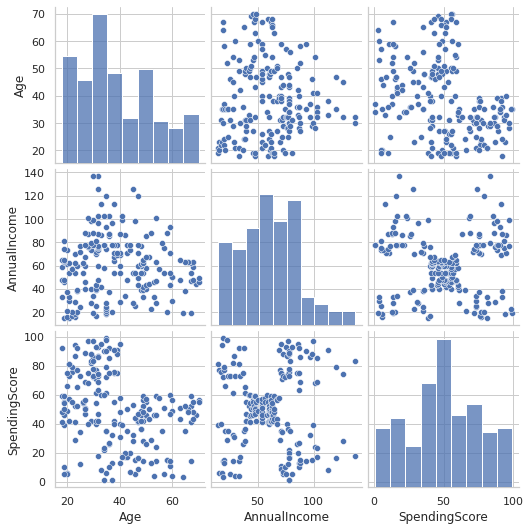

In [56]:
sns.pairplot(data[['Age','AnnualIncome','SpendingScore']])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


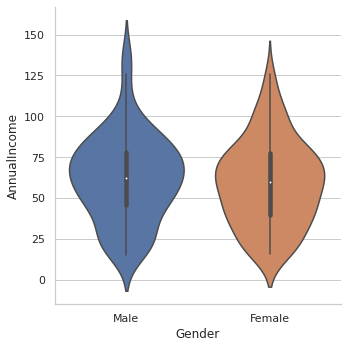

In [57]:
sns.factorplot(x="Gender", y="AnnualIncome", kind='violin',data=data)
plt.show()

In [58]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,GenderValue,AgesBetween,AgeValueBetween
0,1,Male,19,15,39,1,"(17.948, 28.4]",0
1,2,Male,21,15,81,1,"(17.948, 28.4]",0
2,3,Female,20,16,6,0,"(17.948, 28.4]",0
3,4,Female,23,16,77,0,"(17.948, 28.4]",0
4,5,Female,31,17,40,0,"(28.4, 38.8]",1


In [59]:
data.Age.value_counts()[:3]

32    11
35     9
19     8
Name: Age, dtype: int64

In [60]:
AnnualIncome_32=0
AnnualIncome_35=0
AnnualIncome_19=0

AnnualIncome_32=sum(data[data['Age']==32].AnnualIncome)
AnnualIncome_35=sum(data[data['Age']==35].AnnualIncome)
AnnualIncome_19=sum(data[data['Age']==19].AnnualIncome)

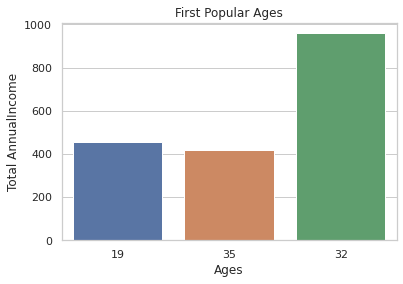

In [61]:
plt.title('First Popular Ages')
sns.barplot(x=['19','35','32'],y=[AnnualIncome_19,AnnualIncome_35,AnnualIncome_32])
plt.xlabel('Ages')
plt.ylabel('Total AnnualIncome')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


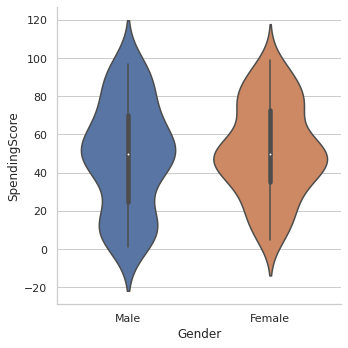

In [62]:
sns.factorplot(x="Gender", y="SpendingScore", kind='violin',data=data)
plt.show()

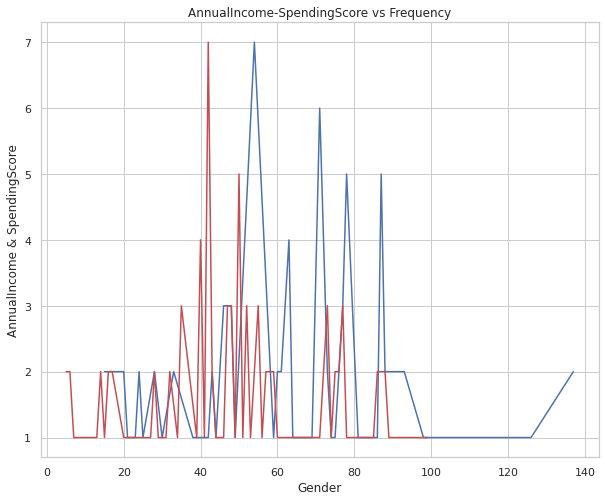

In [63]:
plt.figure(figsize=(10,8))
data[data['Gender']=='Male']['AnnualIncome'].value_counts().sort_index().plot.line(color='b')
data[data['Gender']=='Female']['SpendingScore'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Gender')
plt.ylabel('AnnualIncome & SpendingScore')
plt.title('AnnualIncome-SpendingScore vs Frequency')
plt.show()

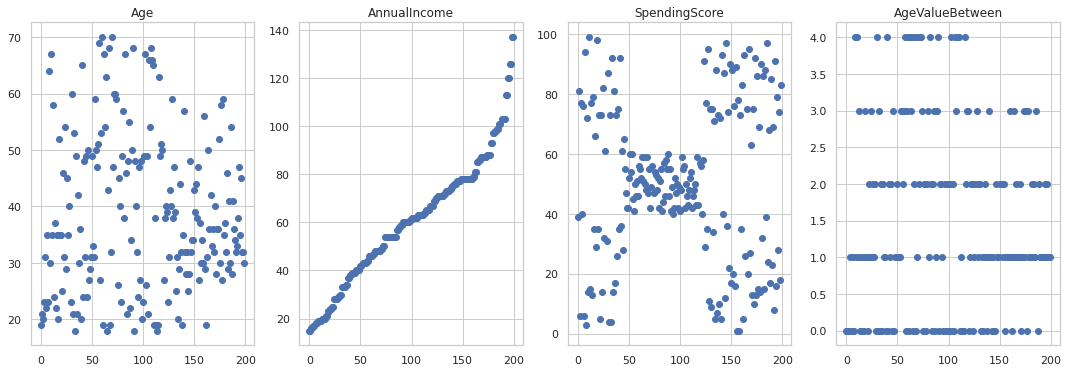

In [64]:
for i,col in enumerate(['Age', 'AnnualIncome', 'SpendingScore','AgeValueBetween']):
    plt.subplot(2,4,i+1)
    plt.scatter([i for i in range(200)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,10)
    plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

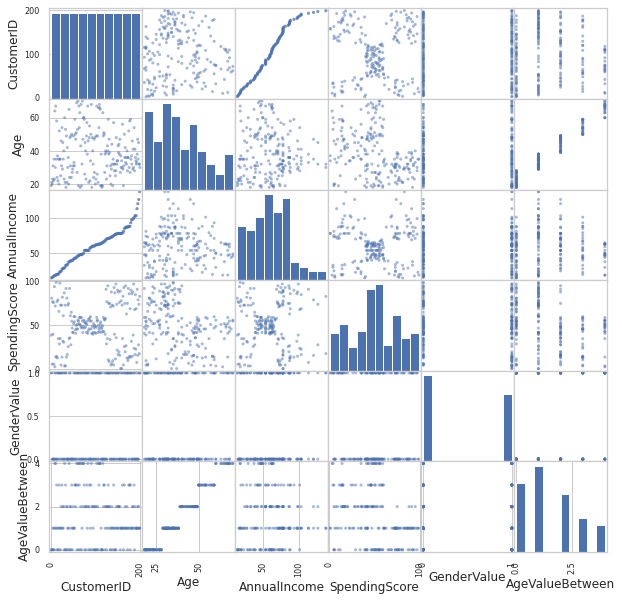

<Figure size 432x288 with 0 Axes>

In [65]:
pd.plotting.scatter_matrix(data,figsize=(10,10))
plt.figure()

In [66]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore',
       'GenderValue', 'AgesBetween', 'AgeValueBetween'],
      dtype='object')

In [67]:
data.drop(['Gender','AgesBetween'],axis=1,inplace=True)
data.drop(['GenderValue','AgeValueBetween'],axis=1,inplace=True)

In [68]:
data.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [69]:
log_data=np.log(data)
good_data=log_data.drop([128,65,66,75,154])
good_data[:10]

,CustomerID,Age,AnnualIncome,SpendingScore
0,0.000000,2.944439,2.708050,3.663562
1,0.693147,3.044522,2.708050,4.394449
2,1.098612,2.995732,2.772589,1.791759
3,1.386294,3.135494,2.772589,4.343805
4,1.609438,3.433987,2.833213,3.688879
5,1.791759,3.091042,2.833213,4.330733
6,1.945910,3.555348,2.890372,1.791759
7,2.079442,3.135494,2.890372,4.543295
8,2.197225,4.158883,2.944439,1.098612
9,2.302585,3.401197,2.944439,4.276666


Dimensionality Reduction

In [70]:
from sklearn.decomposition import PCA
pca=PCA().fit(good_data)
print(pca.explained_variance_ratio_)
print()
print(good_data.columns.values.tolist())
print(pca.components_)

[0.58402105 0.34756297 0.06146719 0.00694879]

['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']
[[-0.88492887 -0.04318647 -0.460206   -0.056976  ]
 [ 0.04281855  0.11355813  0.02984258 -0.99215954]
 [ 0.01298001 -0.99044883  0.08164755 -0.11034632]
 [-0.46357199  0.06519658  0.883546    0.01403143]]


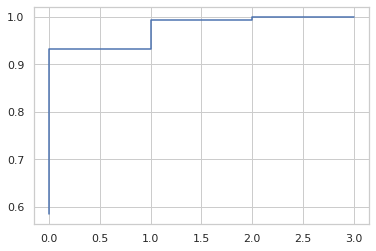

In [71]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

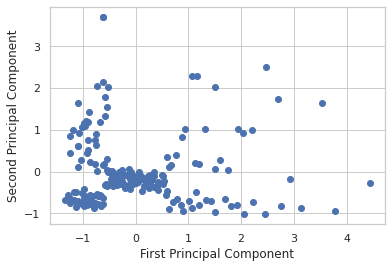

In [72]:
pca=PCA(n_components=2)
pca.fit(good_data)
reduced_data=pca.transform(good_data)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [73]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

,Dim1,Dim2
0,4.434201,-0.266976
1,3.774850,-0.951088
2,3.536739,1.644942
3,3.130720,-0.858906
4,2.929778,-0.163854
5,2.746676,-0.831813
6,2.708568,1.748286
7,2.451763,-1.023636
8,2.474719,2.516909
9,2.233131,-0.717757


Clustering
It is time to cluster the data so that we can extract information from them related to the customer annual spending behaviors.
Clustering
It is time to cluster the data so that we can extract information from them related to the customer annual spending behaviors.

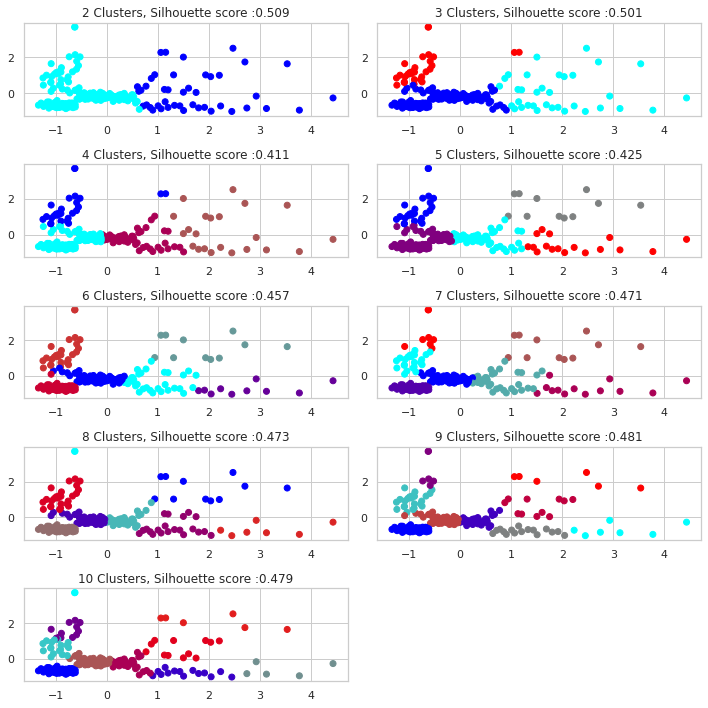

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('BlRd',['blue','red','cyan'])

silhouette_scores=[]
for i in range(2,11):
    cl=KMeans(n_clusters=i,random_state=0)
    result=cl.fit_predict(reduced_data)
    silhouette=silhouette_score(reduced_data,result)
    silhouette_scores.append(silhouette)
    plt.subplot(5,2,i-1)
    plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5])
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

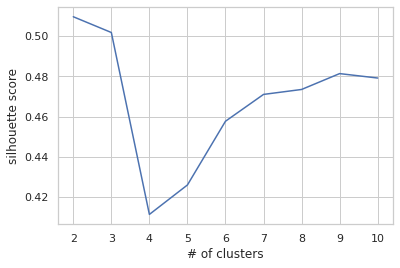

In [75]:
plt.plot([i for i in range(2,11)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()

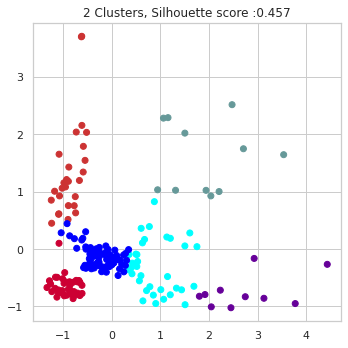

In [76]:
cl=KMeans(n_clusters=6,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
plt.title(str(2)+' Clusters, Silhouette score :'+str(silhouette)[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

Hierarchical Clustering
Here are the results of running hierarchical clustering on the data set. I will try all linkage methods possible to see the differences. Then I will plot dendrograms and clusters side by side.

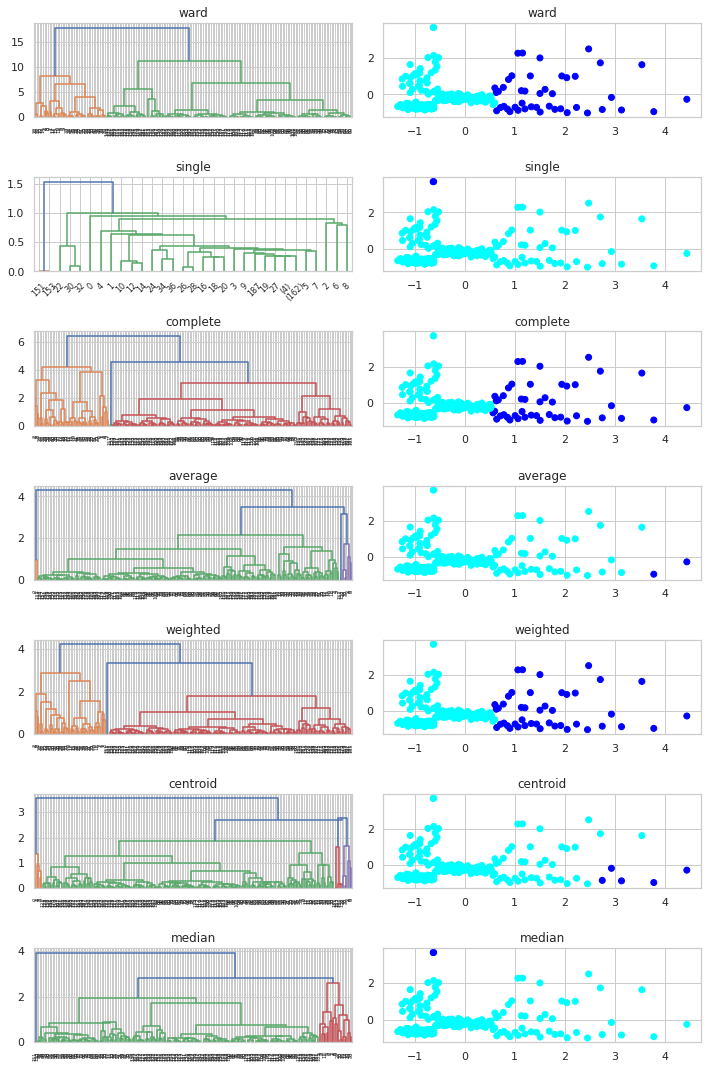

In [77]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

methods=['ward','single','complete','average','weighted','centroid','median']

plot_id=0
for method in methods:
    cl=linkage(reduced_data,method=method)
    
    for sw in ['dendrogram','clusters']:
        if sw=='dendrogram':
            plot_id+=1
            plt.subplot(7,2,plot_id)
            plt.title(method)
            fig,ax=plt.gcf(),plt.gca()
            dn=dendrogram(cl,truncate_mode='level',p=15)
            plt.tight_layout()
            fig.set_size_inches(10,15)
        else:
            plot_id+=1
            labels=fcluster(cl,2,criterion='maxclust')
            plt.subplot(7,2,plot_id)
            plt.title(method)
            plt.scatter(reduced_data.Dim1.values.tolist(),
                       reduced_data.Dim2.values.tolist(),
                       cmap=cmap,
                       c=labels)
plt.show()            

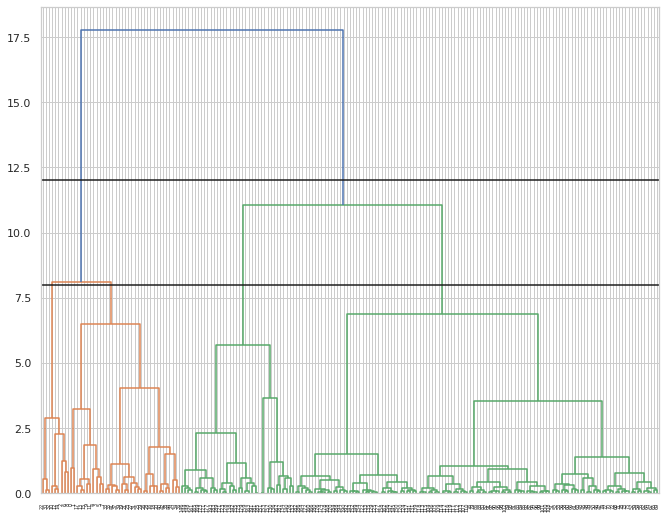

In [78]:
cl=linkage(reduced_data,method='ward')
fig,ax=plt.gcf(),plt.gca()
dn=dendrogram(cl,truncate_mode='level',p=15)
plt.tight_layout()
fig.set_size_inches(10,8)
plt.axhline(y=8,c='k')
plt.axhline(y=12,c='k')
plt.show()

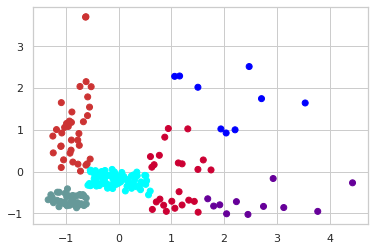

In [79]:
cl=linkage(reduced_data,method='ward')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()
#plt.savefig('img/hierarchical_fav.png')

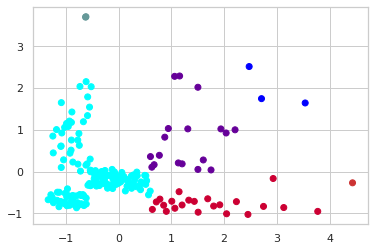

In [80]:
cl=linkage(reduced_data,method='weighted')
labels=fcluster(cl,6,criterion='maxclust')
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()

DBSCAN
Here is the toughest one. I will run this algorithm for epsilons 0.3 through 0.9 with step size of 0.2 and for minimum number of samples 3 through 8 with one increment per step.



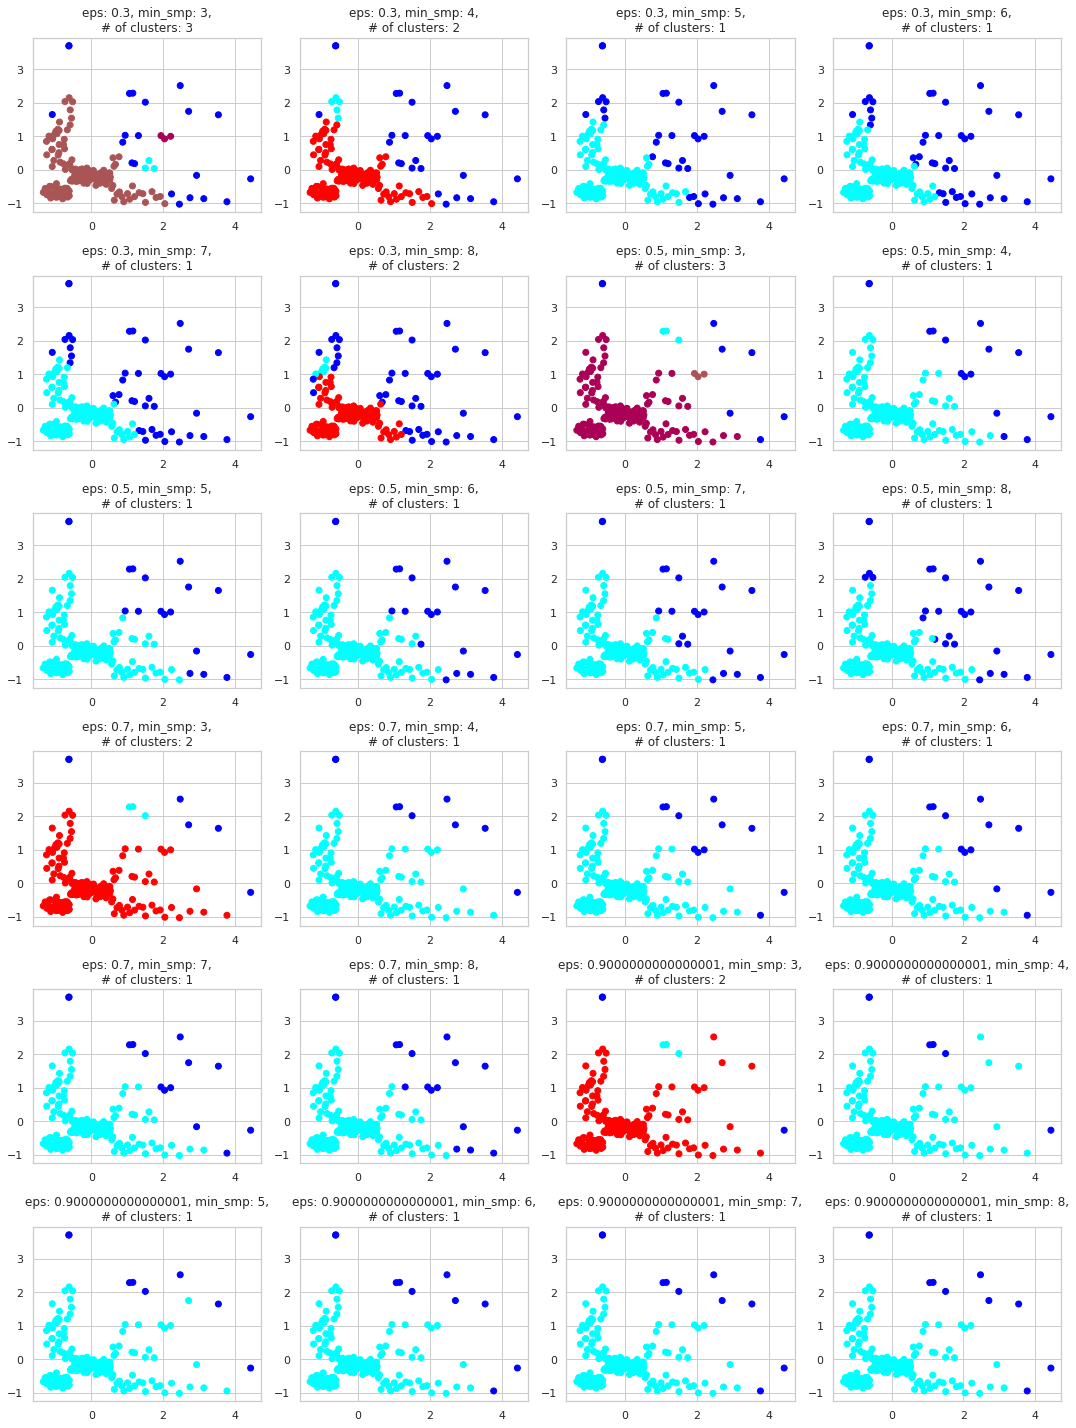

In [81]:
from sklearn.cluster import DBSCAN

plot_id=0
for eps in np.arange(0.3,0.9,0.2):
    for min_samples in range(3,9):
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples=min_samples)
        result=cl.fit_predict(reduced_data)
        n_clusters=len([c for c in list(set(result)) if c!=-1])
        plt.subplot(6,4,plot_id)
        plt.scatter(reduced_data.Dim1.values.tolist(),
                   reduced_data.Dim2.values.tolist(),
                   cmap=cmap,
                   c=result)
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: ' + str(eps)+', min_smp: ' + str(min_samples)+',\n# of clusters: ' + str(n_clusters))
        plt.tight_layout()
plt.show()

None of them resembles the previous results with other algorithms to me.

I think the last one, with one big group at the center may be useful since it groups customers that are like spending together and leaves the ones as outliers.

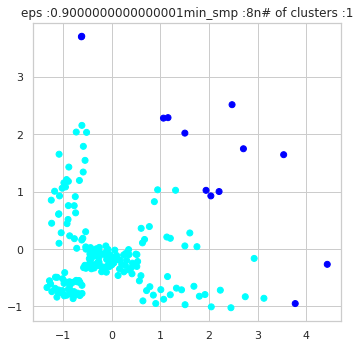

In [82]:
cl=DBSCAN(eps=0.7,min_samples=5)
result=cl.fit_predict(reduced_data)
n_clusters=len([c for c in list(set(result)) if c!=-1])
plt.scatter(reduced_data.Dim1.values.tolist(),
           reduced_data.Dim2.values.tolist(),
           cmap=cmap,
           c=result)
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.title('eps :'+str(eps)+'min_smp :'+str(min_samples)+'n# of clusters :'+str(n_clusters))
plt.tight_layout()
#plt.savefig('img/dbscan_fav.png')
plt.show()